# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Прочтем данные и посмотрим на них**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep = "\t")
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
pd.set_option('display.max_columns', None)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data.shape

(23699, 22)

In [4]:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

<b>Описание данных</b>

    
<b>airports_nearest — расстояние до ближайшего аэропорта в метрах (м)</b>

<b>balcony</b> — число балконов

<b>ceiling_height</b> — высота потолков (м)

<b>cityCenters_nearestv</b> — расстояние до центра города (м)

<b>days_exposition</b> — сколько дней было размещено объявление (от публикации до снятия)

<b>first_day_expositionv</b> — дата публикации

<b>floor</b> — этаж

<b>floors_total</b> — всего этажей в доме

<b>is_apartment</b> — апартаменты (булев тип)

<b>kitchen_area</b> — площадь кухни в квадратных метрах (м²)

<b>last_price</b> — цена на момент снятия с публикации

<b>living_area</b> — жилая площадь в квадратных метрах (м²)

<b>locality_name</b> — название населённого пункта

<b>open_plan</b> — свободная планировка (булев тип)

<b>parks_around3000</b> — число парков в радиусе 3 км

<b>parks_nearest</b> — расстояние до ближайшего парка (м)

<b>ponds_around3000</b> — число водоёмов в радиусе 3 км

<b>ponds_nearest</b> — расстояние до ближайшего водоёма (м)

<b>rooms</b> — число комнат

<b>studio</b> — квартира-студия (булев тип)

<b>total_area</b> — общая площадь квартиры в квадратных метрах (м²)

<b>total_images</b> — число фотографий квартиры в объявлении


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Данные выглядят нормально. Площадь 900 местров, 100 метровые потолки , 19 комнатные квартиры, дом в 60 этажей - это немного смущает

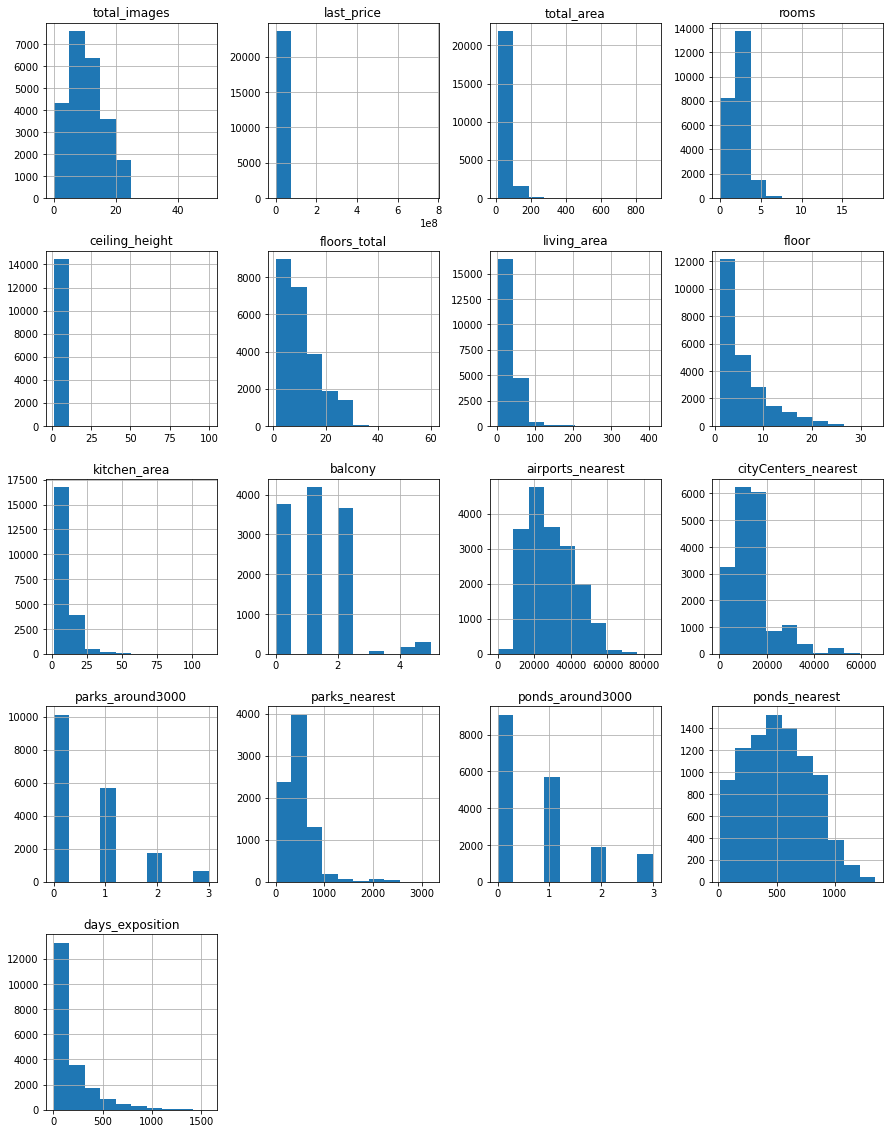

In [7]:
data.hist(figsize=(15, 20));

### Предобработка данных

Подсчитаем кол-во дубликатов

In [8]:
data.duplicated().sum()

0

**Подсчитаем кол-во пропусков**

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Посмотрим теперь в процентах**

In [10]:
data.isnull().sum().sort_values()/data.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64


**Переведем дату**

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

**Вывод: Мы имеем пропуски в 14 столбцах и 8 заполненых стообцов и довольно высокий процент пропусков в столбцах**

Для своего удобства изменю название столбца.

In [12]:
data = data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'})

**Начнем удаление пропусков.**

Рассмотрим колонку **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

In [13]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

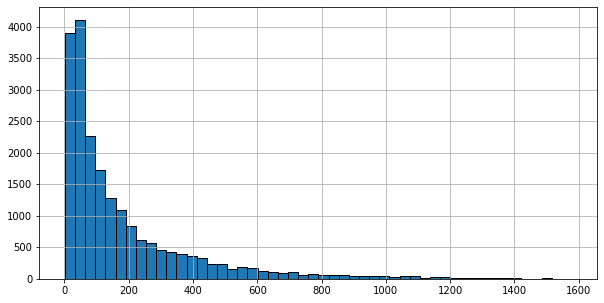

In [14]:
data['days_exposition'].hist(bins=50, figsize=(10,5), ec='black')

Посмотрим поближе

<AxesSubplot:>

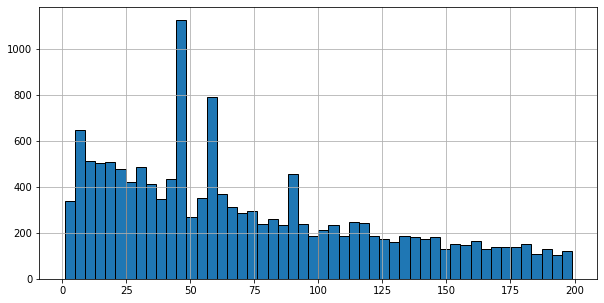

In [15]:
data.query('days_exposition<200')['days_exposition'].hist(bins=50, figsize=(10,5), ec='black')

**Заменим отсутствующие значения медианным значением в 95 дней, по графику видно, что наибольший число приходится примерно на 100 дней и начинает стабильно угасать уже после 100 дней, среднее значение в 180 дней будет слишком большим для времени продажи объявлений.**

Всплески наверное связанны со спецификой работы сервиса

In [19]:
data['days_exposition'].isna().sum()

3181

Рассмотрим  колонку **balcony** — число балконов

In [20]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

**Скорее всего в объявлении просто не указали кол-во балконов потому, что их нет.**

Заменим пустные значения на 0

In [21]:
data['balcony'] = data['balcony'].fillna(0)

Изменим тип

In [22]:
data['balcony'] = data['balcony'].astype('int')

In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим  колонку **is_apartment**— апартаменты (булев тип)

In [24]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

**Тут наверное ситуация, как и с балконами, просто не указали, что тип не аппартаменты.**

Заменим пустые значения на False

In [25]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [26]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим  колонку **floors_total** — всего этажей в доме

In [27]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [28]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Заменять тут значение, как мне кажется бесмысленно.

Оно может быть больше, текущего этажа дома.

Также при определении последний или первый этаж, значения влияют на результат.

просто удалю строки с отсутствующим значением.

In [29]:
data = data.dropna(subset=['floors_total']) 
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64


Изменим тип не может же этажность быть половинчатой.

In [30]:
data['floors_total'] = data['floors_total'].astype('int')

Рассмотрим  колонку **locality_name** — название населённого пункта

In [31]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Много похожих названий

Удалим строки без города, пользователям такие объявления не нужны

плюс мешают в анализе.


In [32]:
data = data.dropna(subset=['locality_name'])

In [33]:
data = data.reset_index(drop=True)

In [34]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Рассмотрим  колонки **parks_around3000 и parks_nearest** — число парков в радиусе 3 км и расстояние до ближайшего парка (м)

In [35]:
##data['parks_around3000'].describe()

In [36]:
##data['parks_nearest'].describe()

In [37]:
##data['parks_around3000'].hist(bins=10, figsize=(10,5), ec='black')

**В основном значения принимаются от 0 до 3.**

In [38]:
##data['parks_nearest'].hist(bins=50, figsize=(10,5), ec='black')

In [39]:
##data['parks_nearest'].hist(bins=50, figsize=(10,5), ec='black', range=(100,800))

В среднем расстояние до парка около 500 м.
А кол-во парков в радиусе 3 км  = 1.


Заменю отсутствующие значиния в столбце ponds_around3000 на 1, а ponds_nearest на медианное значение.

Не может же быть, что парков нет в радиусе 3 км, но расстояние до него 500м

In [41]:
data['parks_around3000'] = data['parks_around3000'].fillna(1)

По примеру выше сделаю следующие столбцы parks_nearest  parks_around3000 city_centers_nearest airports_nearest

In [42]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(1)

In [43]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [47]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

***Вывод скорее всего пользователи, которые хотели продать свою недвижимость, просто не знали и не указали, все пункты связанные с расстоянием кол-во обьектов до него***

Рассмотрим  колонки **kitchen_area и living_area** — площадь кухни и жилая зона

In [48]:
data['kitchen_area'].describe()

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [49]:
data['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

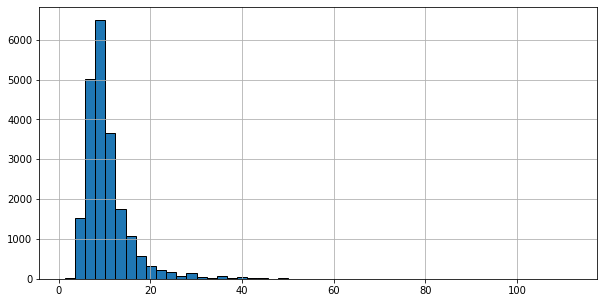

In [50]:
data['kitchen_area'].hist(bins=50, figsize=(10,5), ec='black')

<AxesSubplot:>

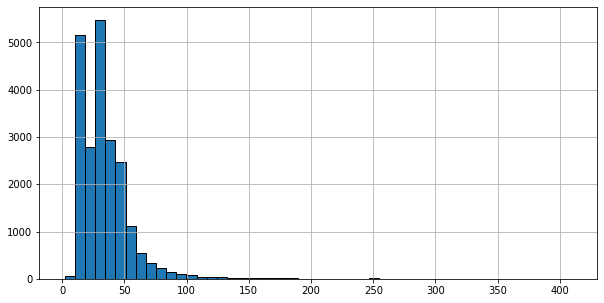

In [51]:
data['living_area'].hist(bins=50, figsize=(10,5), ec='black')

In [52]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,1.0,NaN,1.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,1.0,NaN,1.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


***Сложно сказать, как заполнить пропуски, оставлю без изменений.***

Можно конечно мудрить и заменить на значение с % от общей, но сомневаюсь.

**Колонка ceiling_height - высота потолка**

In [53]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [54]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

<AxesSubplot:>

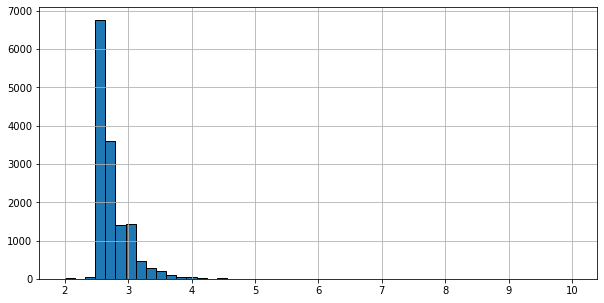

In [55]:
data['ceiling_height'].hist(bins=50, figsize=(10,5), ec='black',range=(2,10))

Значение 100 выглядит весьма странным надо отбрасить значения больше 10, скорее всего промахнулись запятой.

In [56]:
data.query('ceiling_height<2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5683,5,1500000.0,42.8,2017-08-14,2,1.20,2,27.5,1,False,False,False,5.20,0,городской посёлок Мга,NaN,NaN,1.0,NaN,1.0,NaN,248.0
16837,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22463,16,6000000.0,55.0,2018-10-31,2,1.00,12,32.4,7,False,False,False,10.00,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


***Высота потолка меньше 2 метров совсем для лилипутов***

отбросим эти троки

In [57]:
data.query('2<=ceiling_height<=5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
13,20,3550000.0,42.80,2017-07-01,2,2.56,5,27.0,5,False,False,False,5.20,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23557,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23559,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23560,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23563,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [58]:
data['ceiling_height'].shape[0] - data['ceiling_height'].isna().sum() - data.query('2<=ceiling_height<=5').shape[0]

39

Всего 39 строчек больше 5 метров взглянем на них

In [59]:
data.query('ceiling_height>5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
353,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,NaN,2,Гатчина,NaN,NaN,1.0,NaN,1.0,NaN,259.0
461,15,66571000.0,280.3,2015-06-11,6,5.2,8,159.5,7,False,False,False,21.1,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1022,20,155000000.0,310.0,2018-10-12,5,5.3,3,190.0,3,False,False,False,63.0,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1383,20,59800000.0,399.0,2015-01-21,5,5.6,6,NaN,6,False,False,False,NaN,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3134,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3459,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.3,2,False,False,False,7.3,0,деревня Нурма,NaN,NaN,1.0,NaN,1.0,NaN,125.0
4621,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4852,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,1.0,NaN,1.0,NaN,28.0
5051,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5219,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2,деревня Мины,NaN,NaN,1.0,NaN,1.0,NaN,540.0


In [60]:
data.query('ceiling_height>=10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
353,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,NaN,2,Гатчина,NaN,NaN,1.0,NaN,1.0,NaN,259.0
3134,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4621,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4852,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,1.0,NaN,1.0,NaN,28.0
5051,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5219,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2,деревня Мины,NaN,NaN,1.0,NaN,1.0,NaN,540.0
5641,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,False,False,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5777,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6213,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,False,False,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9334,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,False,False,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [61]:
data.query('ceiling_height>=20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
353,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,NaN,2,Гатчина,NaN,NaN,1.0,NaN,1.0,NaN,259.0
3134,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4621,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4852,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,1.0,NaN,1.0,NaN,28.0
5051,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5219,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2,деревня Мины,NaN,NaN,1.0,NaN,1.0,NaN,540.0
5641,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,False,False,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5777,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6213,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,False,False,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9334,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,False,False,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


думаю тут значения которые больше 20 разделю на 10.

In [62]:
data.loc[(data['ceiling_height'] > 20), 'ceiling_height'] /= 10

Проверю результат.

In [63]:
data.query('ceiling_height>=20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17399,15,6700000.0,92.9,2019-02-19,3,20.0,17,53.2,14,False,False,False,12.0,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN


In [64]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

C одним выбросом можно работать

**Не вижу особой связи в заполнении высоты потолков  ceiling_height заполню все отсутствующие значение чем-то не стандарным.<br>
например:-1** 

вдальнейшем пригодится еще для смены типа данных

In [65]:
data['ceiling_height'] = data['ceiling_height'].fillna(-1)

Сделаю тоже самое для living_area и kitchen_area 

In [66]:
data['kitchen_area'] = data['kitchen_area'].fillna(-1)

In [67]:
data['living_area'] = data['living_area'].fillna(-1)

Посмотрим на кол-во пропусков

In [68]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Мы избавились от пропусков.**

Теперь изменим тип данных.

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [71]:
qwerty = ['total_area', 'last_price', 'living_area', 'kitchen_area',  'parks_around3000', 'ponds_around3000']

In [72]:
for x in qwerty:
    data[x] = data[x].astype('int')

In [73]:
#результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  int64         
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  int64         
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  int64         
 13  balcony         

**Избавимся от неявных дубликатов в locality_name**

In [74]:
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [75]:
len(data['locality_name'].unique())

364

In [76]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [77]:
len(data['locality_name'].unique())

330

Избавились от 34 дубликатов, продолжим

In [78]:
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'поселок Шушары',
 'городской поселок Янино-1',
 'поселок Парголово',
 'поселок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'деревня Федоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'поселок Металлострой',
 'поселок городского типа Лебяжье',
 'поселок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'поселок Аннино',
 'поселок городского типа Ефимовский',
 'поселок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'поселок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'поселок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 'Мурино',
 'Шлиссель

In [79]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')

In [80]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')

In [81]:
len(data['locality_name'].unique())

322

In [82]:
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'поселок Шушары',
 'поселок Янино-1',
 'поселок Парголово',
 'поселок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок Красный Бор',
 'Гатчина',
 'деревня Федоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'поселок Металлострой',
 'поселок Лебяжье',
 'поселок Сиверский',
 'поселок Молодцово',
 'поселок Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'поселок Аннино',
 'поселок Ефимовский',
 'поселок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'поселок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'поселок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 'Мурино',
 'Шлиссельбург',
 'Никольское',
 'Зеленогорск',
 'Сосновый Бор',
 'деревня Оржицы',
 'деревня Кальти

Вроде больше дубликатов нет

**Обработка аномальных значений**

In [83]:
old_data = data

Рассмотрим еще раз столбцы со стоимостью квартиры, количеством комнат и общей площадью.

In [84]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

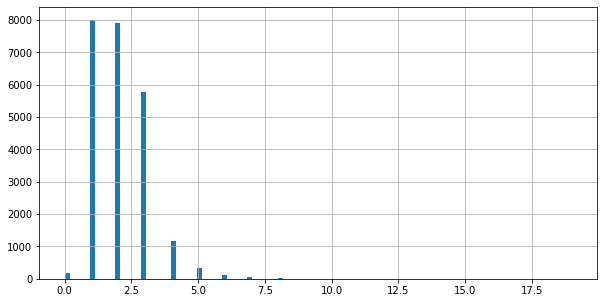

In [85]:
data['rooms'].hist(bins=100, figsize=(10,5))

In [86]:
data.query('rooms == 0')['rooms'].count()

194

In [87]:
data.query('rooms > 6')['rooms'].count()

90

<AxesSubplot:>

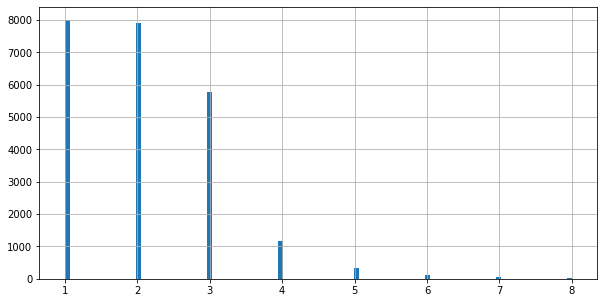

In [88]:
data['rooms'].hist(bins=100, figsize=(10,5),range=(1,8))

Явно не может быть квартир с 0 комнат уберем их из списка,а квартиры с кол-во комнат более 6 встерчаются крайне редко отбросим их.

In [89]:
data = data.query('rooms > 0')

In [90]:
data = data.query('rooms <= 6')

In [91]:
data.shape[0] / old_data.shape[0]

0.9879482283046892

Разница в данных меньше 2% что приемлемо.

**Рассмотрим общую площадь**

In [92]:
data['total_area'].describe()

count    23281.000000
mean        59.507624
std         31.933987
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        507.000000
Name: total_area, dtype: float64

<AxesSubplot:>

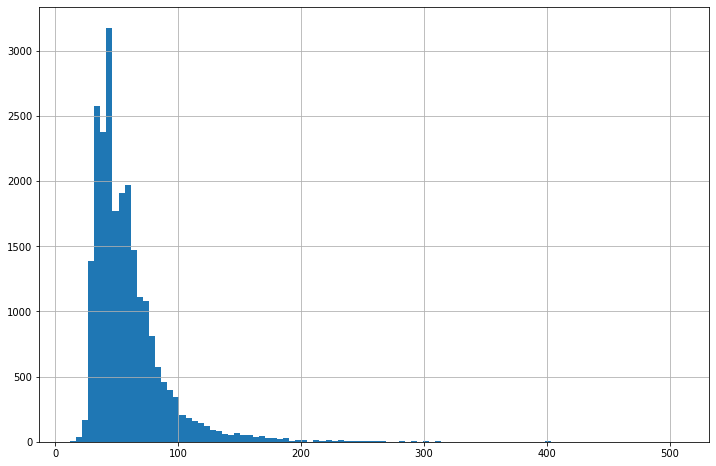

In [93]:
data['total_area'].hist(bins=100,figsize=(12,8))

In [94]:
data.query('total_area > 200')['total_area'].count()

158

In [95]:
data.query('total_area <18')['total_area'].count()

12

Общая площадь более 100 м уже встречается не так часто, а после 200 близится к единичным случаям возьмем верхнюю границу 200, также отбросим те значения, которые не соответсвуют (Стандартный минимальный метраж — 18 кв. м на 1 человека).

In [96]:
data = data.query('total_area >= 18')

In [97]:
data = data.query('total_area <= 200')

In [98]:
data.shape[0] / old_data.shape[0]

0.980734139613834

**Рассмотрим Стоимость**

In [99]:
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23560     9700000
23561     3100000
23562     2500000
23563    11475000
23564     1350000
Name: last_price, Length: 23111, dtype: int64

In [100]:
data['last_price'].describe()

count    2.311100e+04
mean     6.039337e+06
std      6.263170e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [101]:
data['last_price'] = data['last_price'] / 1000000

In [102]:
data['last_price'].describe()

count    23111.000000
mean         6.039337
std          6.263170
min          0.012190
25%          3.450000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price, dtype: float64

<AxesSubplot:>

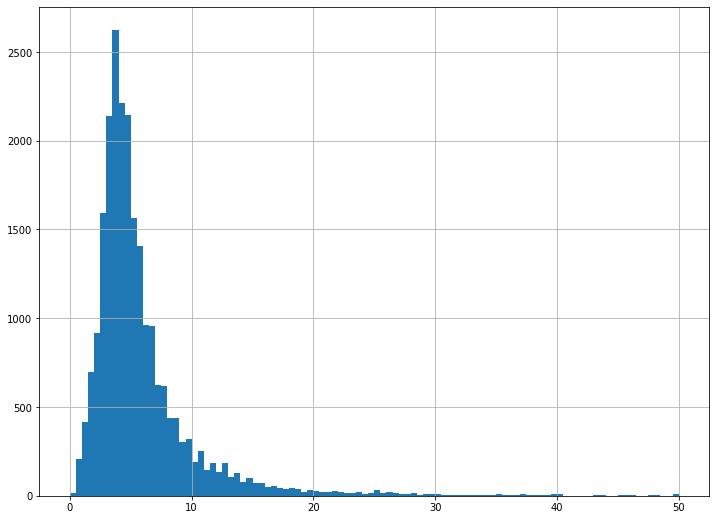

In [103]:
data['last_price'].hist(bins=100,figsize=(12,9),range=(0,50))

<AxesSubplot:>

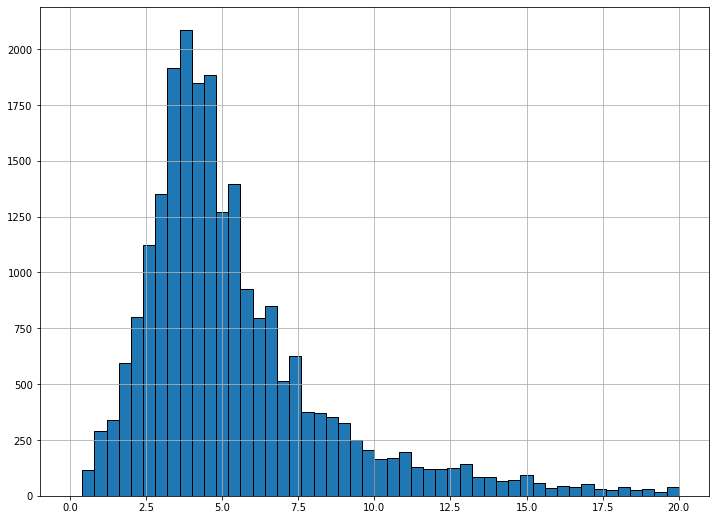

In [104]:
data['last_price'].hist(bins=50,figsize=(12,9),range=(0,20),ec='black')

In [105]:
data.query('last_price >= 30')['last_price'].count()

190

In [106]:
data.query('last_price <= 1.5')['last_price'].count()

682

Значения стоимости меньше 2 млн. встречаются  не часто, возьмем нижнюю границу в 1.5 млн, Стоимость выше 20 тоже встречаются не часто, а после 30 стремятся к 0, верхнюю границу примем за 30 млн

In [107]:
data = data.query('last_price > 1.5')

In [108]:
data = data.query('last_price <= 30')

In [109]:
data.shape[0] / old_data.shape[0]

0.9440271589221303

**Избавились от аномальных значений.**

### Посчитайте и добавьте в таблицу новые столбцы

**Добавим  в таблицу новые столбцы по заданию со следующими параметрами:**

цена одного квадратного метра;<br>
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);<br>
месяц публикации объявления;<br>
год публикации объявления;<br>
тип этажа квартиры (значения — «первый», «последний», «другой»);<br>
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).<br>

In [110]:
data['price_per_m2'] = data['last_price'] * 1000000/ data['total_area']

In [111]:
data['price_per_m2'] = data['price_per_m2'].round(1)
data['price_per_m2'] 

0        120370.4
1         83750.0
2         92785.7
4        100000.0
5         96333.3
           ...   
23559     74193.5
23560     72932.3
23561     52542.4
23562     44642.9
23563    150986.8
Name: price_per_m2, Length: 22246, dtype: float64

In [112]:
data['day_of_publicate'] = data['first_day_exposition'].dt.weekday

In [113]:
data['month_of_publicate'] = data['first_day_exposition'].dt.month

In [114]:
data['year_of_publicate'] =  data['first_day_exposition'].dt.year

In [115]:
def floor_category(flr):
    floor = flr['floor']
    floors_total = flr['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [116]:
data['type_floor'] = data.apply(floor_category, axis = 1)

In [117]:
data['city_centers_km'] = data['city_centers_nearest'] / 1000

Округлю правильно.

In [118]:
data['city_centers_km'] = data['city_centers_km'].round()

In [119]:
data['city_centers_km'].head(5)

0    16.0
1    19.0
2    14.0
4     8.0
5     NaN
Name: city_centers_km, dtype: float64

In [120]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publicate,month_of_publicate,year_of_publicate,type_floor,city_centers_km
0,20,13.000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3.350,40,2018-12-04,1,-1.00,11,18,1,False,False,False,11,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,83750.0,1,12,2018,первый,19.0
2,10,5.196,56,2015-08-20,2,-1.00,5,34,4,False,False,False,8,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.7,3,8,2015,другой,14.0
4,2,10.000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2.890,30,2018-09-10,1,-1.00,12,14,5,False,False,False,9,0,поселок Янино-1,NaN,NaN,1,NaN,1,NaN,55.0,96333.3,0,9,2018,другой,NaN
6,6,3.700,37,2017-11-02,1,-1.00,26,10,6,False,False,False,14,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,100000.0,3,11,2017,другой,19.0
7,5,7.915,71,2019-04-18,2,-1.00,24,-1,22,False,False,False,18,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,111478.9,3,4,2019,другой,12.0
8,20,2.900,33,2018-05-23,1,-1.00,27,15,26,False,False,False,8,0,поселок Мурино,NaN,NaN,1,NaN,1,NaN,189.0,87878.8,2,5,2018,другой,NaN
9,18,5.400,61,2017-02-26,3,2.50,9,43,7,False,False,False,6,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.6,6,2,2017,другой,15.0
10,5,5.050,39,2017-11-16,1,2.67,12,20,3,False,False,False,8,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,129487.2,3,11,2017,другой,14.0


### Проведите исследовательский анализ данных

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

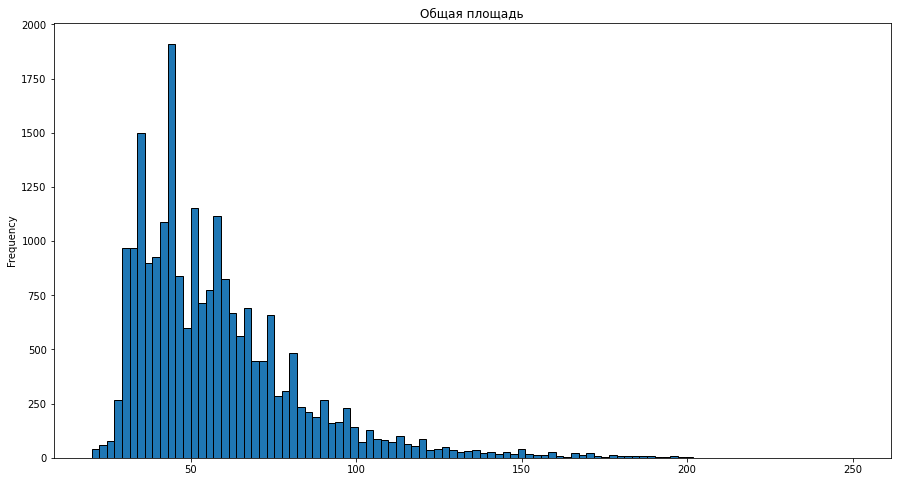

In [121]:
data['total_area'].plot(kind='hist', title='Общая площадь', figsize=(15,8), ec='black', bins=100,range=(20,250))

In [122]:
data['living_area'].sort_values(ascending=False).head(10)

21554    164
22774    159
9347     150
11732    147
18687    145
16110    145
4687     142
13651    140
12478    140
12496    140
Name: living_area, dtype: int64

In [123]:
data['living_area'].mean()

30.33754382810393

<AxesSubplot:title={'center':'Живая зона'}, ylabel='Frequency'>

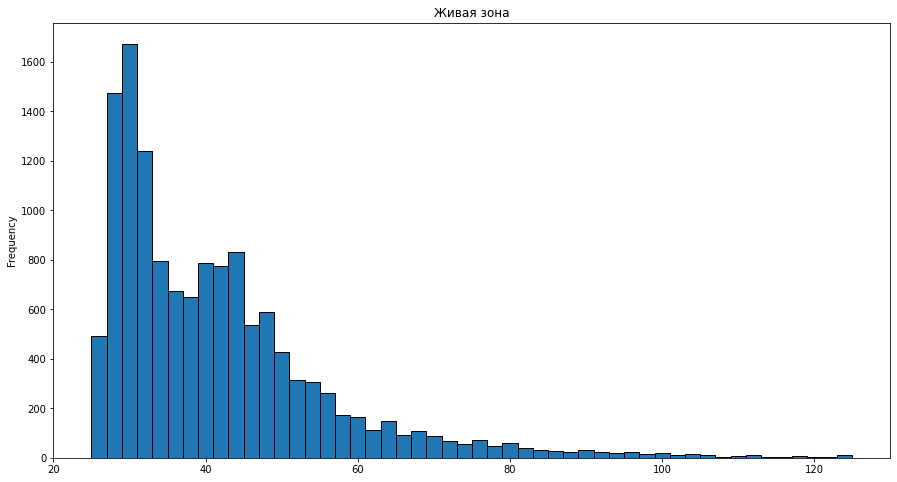

In [124]:
data['living_area'].plot(kind='hist', title='Живая зона', figsize=(15,8), ec='black', bins=50,range=(25,125))

In [125]:
data['living_area'].sort_values(ascending=False).head(10)


21554    164
22774    159
9347     150
11732    147
18687    145
16110    145
4687     142
13651    140
12478    140
12496    140
Name: living_area, dtype: int64

In [126]:
data['living_area'].mean()

30.33754382810393

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

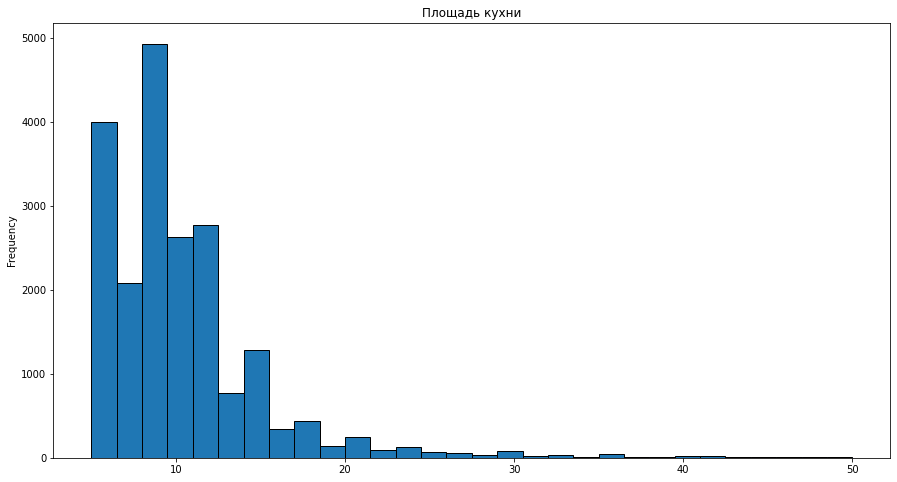

In [127]:
data['kitchen_area'].plot(kind='hist', title='Площадь кухни', figsize=(15,8), ec='black', bins=30,range=(5,50))

In [128]:
data['kitchen_area'].mean()

9.167580688663131

In [129]:
data['kitchen_area'].sort_values(ascending=False).head(10)


18345    65
22849    65
19390    64
15693    64
14814    62
3546     60
20754    58
4299     56
16867    55
17464    54
Name: kitchen_area, dtype: int64

<AxesSubplot:ylabel='Frequency'>

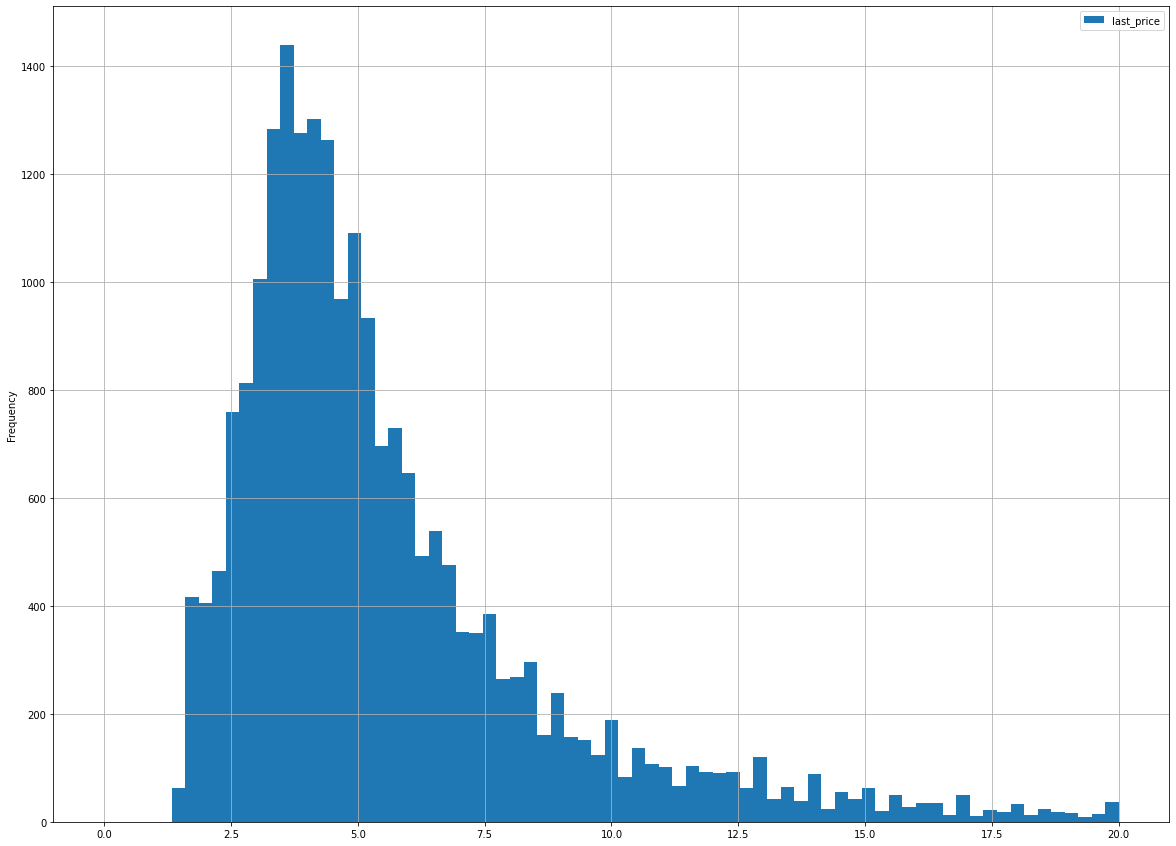

In [130]:
data.plot(y = 'last_price', kind = 'hist', bins =75, grid=True, range = (0,20), figsize = (20,15))

In [131]:
data['last_price'].median()

4.7

In [132]:
data['last_price'].sort_values(ascending=False).head(10)


3284     30.000
8003     30.000
6387     30.000
10334    30.000
21977    30.000
6475     30.000
15852    30.000
11462    29.999
3664     29.999
6887     29.999
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Кол-во комнат'}, ylabel='Frequency'>

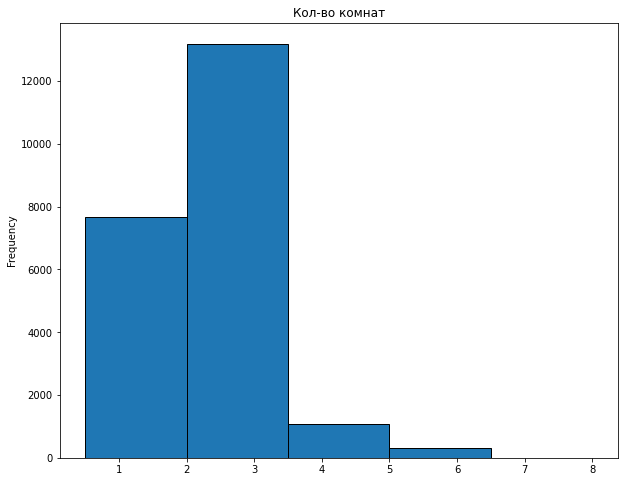

In [133]:
data['rooms'].plot(kind='hist', title='Кол-во комнат', figsize=(10,8), ec='black', bins=5, range=(0.5,8))

In [134]:
data.groupby('rooms')['rooms'].count()

rooms
1    7669
2    7593
3    5602
4    1079
5     245
6      58
Name: rooms, dtype: int64

In [135]:
data['rooms'].mean()

2.0475591117504273

In [136]:
data['rooms'].sort_values(ascending=False).head(10)


52       6
22171    6
14564    6
21900    6
14426    6
11732    6
7528     6
21997    6
21100    6
13288    6
Name: rooms, dtype: int64

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

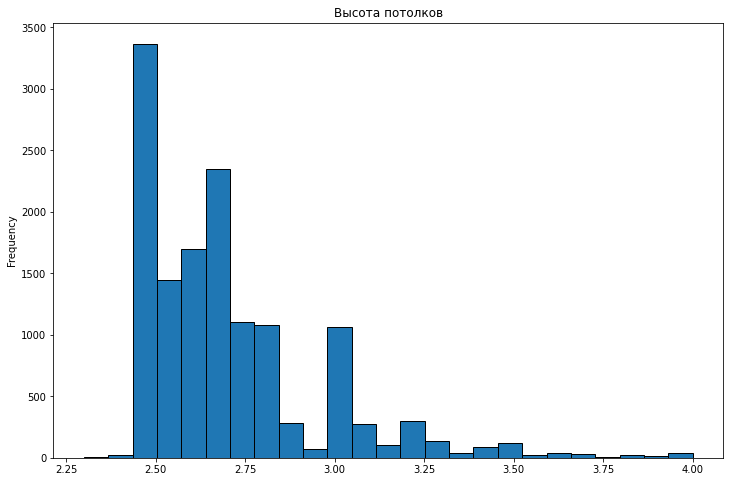

In [137]:
data['ceiling_height'].plot(kind='hist', title='Высота потолков', figsize=(12,8), ec='black', bins=25,range=(2.3,4))

In [138]:
data['ceiling_height'].median()

2.5

In [139]:
data['ceiling_height'].sort_values(ascending=False).head(10)


17399    20.0
14975    14.0
22184    10.3
22739    10.0
5833      8.3
17345     8.0
15656     8.0
12557     5.3
2791      4.8
19035     4.7
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'Этаж'}, ylabel='Frequency'>

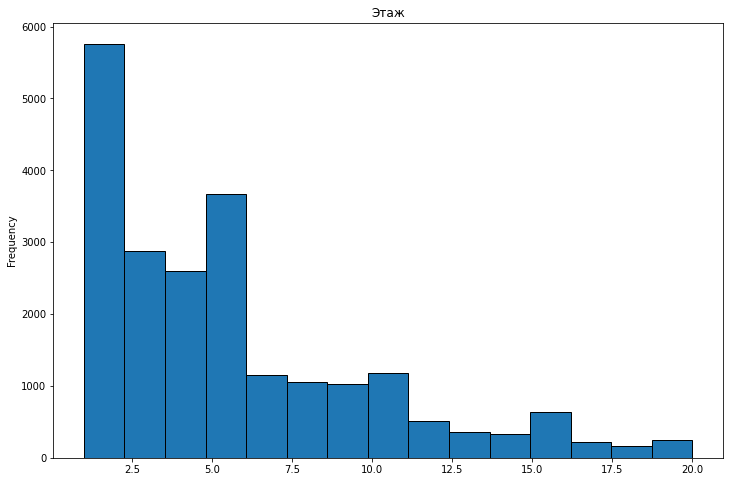

In [140]:
data['floor'].plot(kind='hist', title='Этаж', figsize=(12,8), ec='black', bins=15,range=(1,20))

In [141]:
data['floor'].median()

4.0

In [142]:
data['floor'].sort_values(ascending=False).head(10)

18116    33
11507    32
18526    31
1911     30
11017    29
395      28
7671     27
4073     27
23160    27
2619     27
Name: floor, dtype: int64

<AxesSubplot:title={'center':'Всего этажей в доме'}, ylabel='Frequency'>

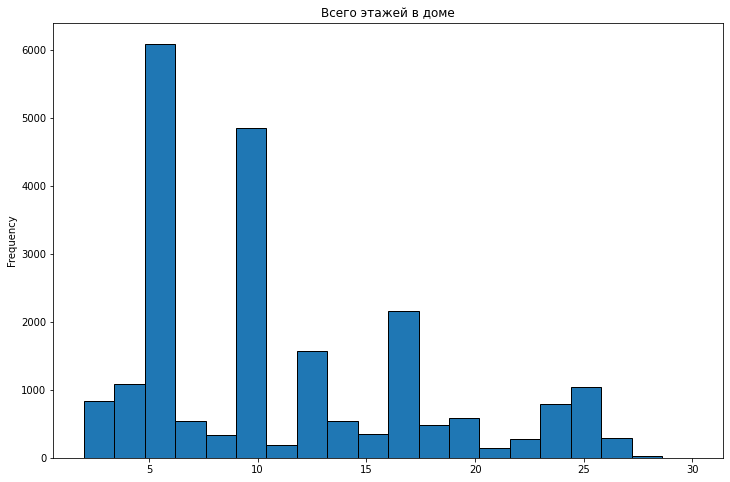

In [143]:
data['floors_total'].plot(kind='hist', title='Всего этажей в доме', figsize=(12,8), ec='black', bins=20,range=(2,30))

In [144]:
data['floors_total'].median()

9.0

In [145]:
data['floors_total'].sort_values(ascending=False).head(10)

2245     60
16635    52
16837    37
395      36
11017    36
5777     36
4831     35
1056     35
18526    35
18514    35
Name: floors_total, dtype: int64

***Тип этажа***

In [146]:
type_floors = data.groupby('type_floor')['type_floor'].count()

In [147]:
print(type_floors)

type_floor
другой       16579
первый        2661
последний     3006
Name: type_floor, dtype: int64


<AxesSubplot:>

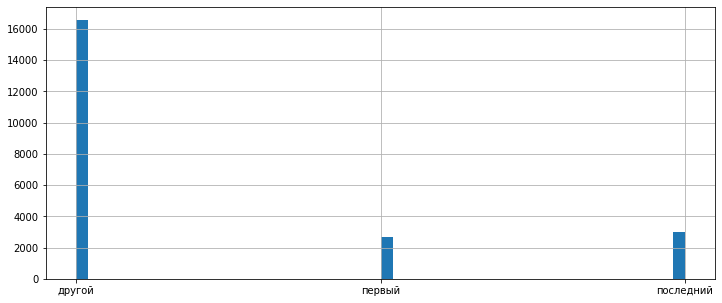

In [148]:
data['type_floor'].hist(figsize=(12,5),bins=50)

<AxesSubplot:title={'center':'Расстояние до центра города в метрах'}, ylabel='Frequency'>

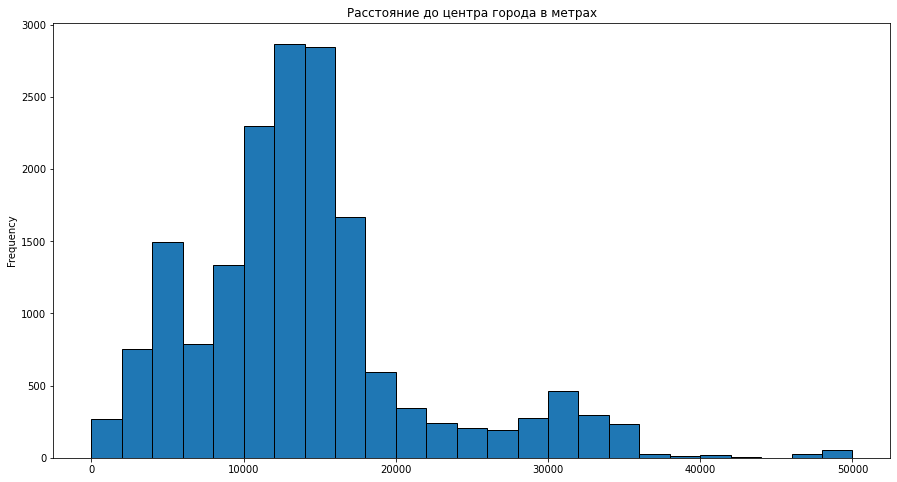

In [149]:
data['city_centers_nearest'].plot(kind='hist', title='Расстояние до центра города в метрах', figsize=(15,8), ec='black', bins=25, range=(0,50000))

In [150]:
data['city_centers_nearest'].mean()

14396.201267557382

In [151]:
data['city_centers_nearest'].sort_values(ascending=False).head(10)

9594     65968.0
5313     65952.0
574      65764.0
20629    65105.0
5191     64857.0
18780    62706.0
2961     62454.0
16476    61495.0
22992    60223.0
4420     59626.0
Name: city_centers_nearest, dtype: float64

<AxesSubplot:title={'center':'расстояние до ближайшего аэропорта'}, ylabel='Frequency'>

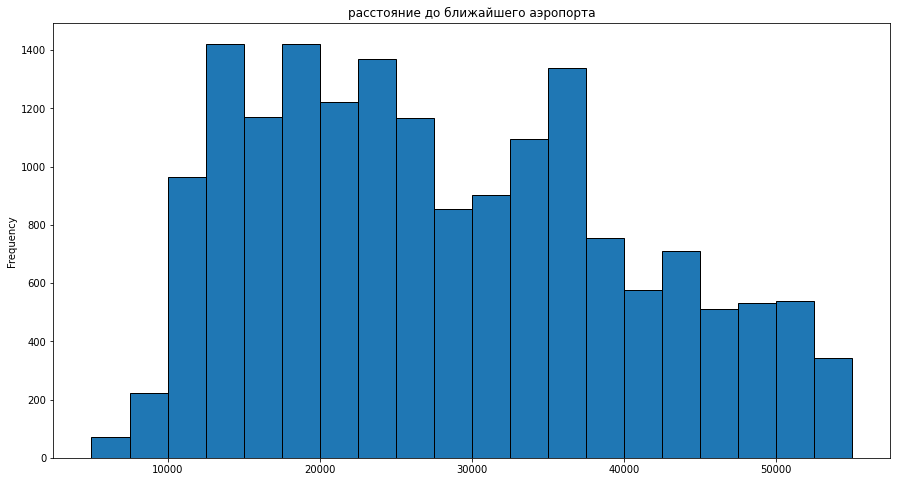

In [152]:
data['airports_nearest'].plot(kind='hist', title='расстояние до ближайшего аэропорта', figsize=(15,8), ec='black', bins=20, range=(5000,55000))

In [153]:
data['airports_nearest'].median()

26903.0

In [154]:
data['airports_nearest'].sort_values(ascending=False).head(10)

9594     84869.0
5313     84853.0
574      84665.0
20629    84006.0
5191     83758.0
18780    81607.0
2961     81355.0
4420     78527.0
935      75646.0
374      73827.0
Name: airports_nearest, dtype: float64

<AxesSubplot:title={'center':'Расстояние до ближайшего парка'}, ylabel='Frequency'>

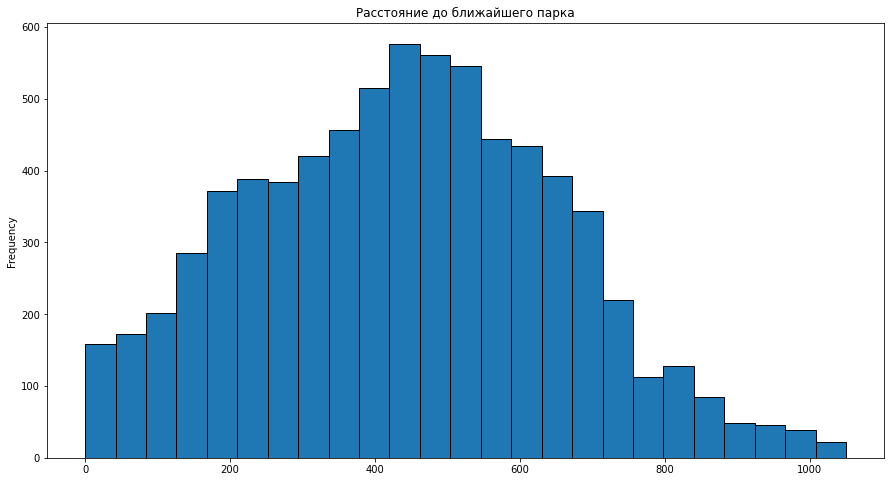

In [155]:
data['parks_nearest'].plot(kind='hist', title='Расстояние до ближайшего парка', figsize=(15,8), ec='black', bins=25, range=(0,1050))

In [156]:
data['parks_nearest'].median()

456.0

In [157]:
data['parks_nearest'].sort_values(ascending=False).head(10)

10898    3190.0
19322    3190.0
1585     3064.0
19101    3013.0
22949    2984.0
2648     2905.0
1854     2888.0
7815     2880.0
3847     2847.0
21878    2768.0
Name: parks_nearest, dtype: float64

<AxesSubplot:title={'center':'День и месяц публикации объявления'}, ylabel='Frequency'>

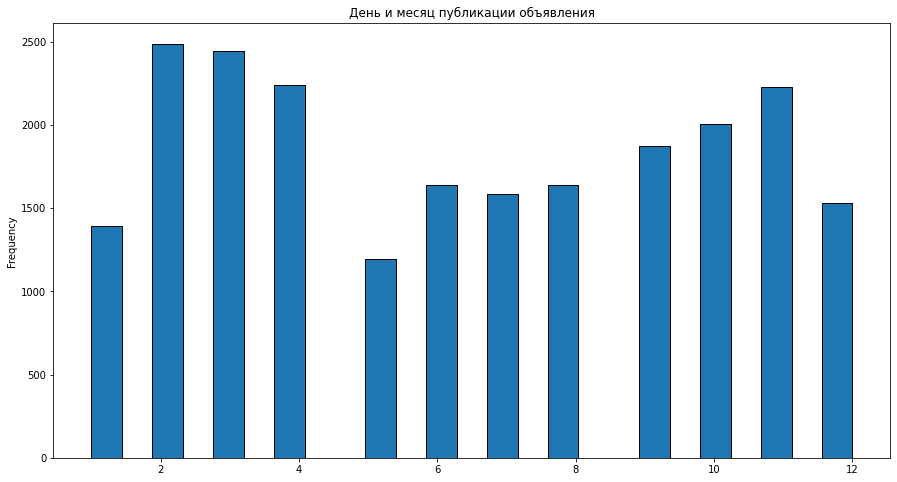

In [158]:
data['month_of_publicate'].plot(kind='hist', title='День и месяц публикации объявления', figsize=(15,8), ec='black', bins=25, range=(1,12))


<AxesSubplot:title={'center':'День публикации'}, ylabel='Frequency'>

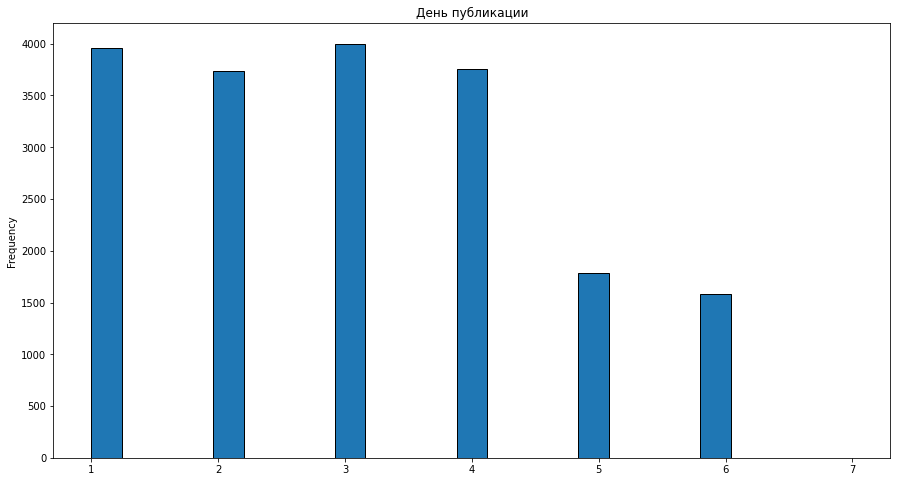

In [159]:
data['day_of_publicate'].plot(kind='hist', title='День публикации', figsize=(15,8), ec='black', bins=25, range=(1,7))

Обновим график

<AxesSubplot:title={'center':'День публикации'}, ylabel='Frequency'>

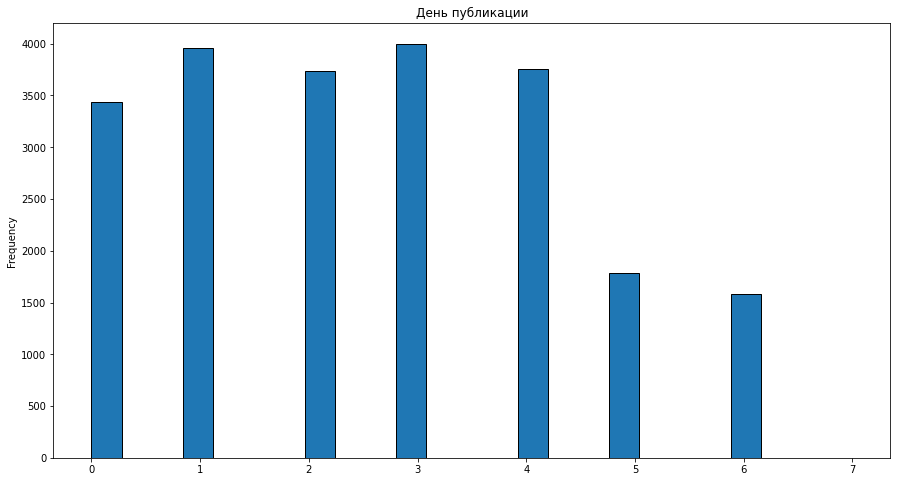

In [160]:
data['day_of_publicate'].plot(kind='hist', title='День публикации', figsize=(15,8), ec='black', bins=25, range=(0,7))

In [161]:
month_pub = data.groupby('month_of_publicate')['month_of_publicate'].count()

In [162]:
month_pub

month_of_publicate
1     1390
2     2488
3     2442
4     2238
5     1193
6     1641
7     1582
8     1637
9     1873
10    2007
11    2226
12    1529
Name: month_of_publicate, dtype: int64

In [163]:
day_pub = data.groupby('day_of_publicate')['day_of_publicate'].count()

In [164]:
day_pub

day_of_publicate
0    3433
1    3957
2    3734
3    4001
4    3759
5    1781
6    1581
Name: day_of_publicate, dtype: int64

**Вывод**

**Общая площадь** - 
Основная часть квартир с общей площадью менее 100 м².

**Жилая площадь** - 
Больше все всего значений приходится на квартиры от 10 до 50 м² . Пиковые значение скорее всего вызваны количеством комнат в квартире.

**Площадь кухни **- 
Кухни  от 5 до 15 м²  самые распространённые. 

**Цена объекта** - 
Цена квартиры составляет примерно 4.7 миллиона. Также есть квартиры на порядок дороже, скорее всего из-за типа апартаменты.

**Количество комнат**- 
В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир.

**Высота потолков **- 
Большинство вариантов имеют высоту потолков от 2,5 до 4 метров. 

**Тип этажа квартиры («первый», «последний», «другой»)**- 
Большинство квартир с типом этажа другой, остальные типы имеют примерно равную долю.

**Общее количество этажей в доме**  - 
Больше всего домов с 5,10,18 этажами. Это связано с типовыми типами домов.

**Расстояние до центра города в метрах**  -
Расстояние до центра города в метрах занимает 14000 м большой пик, связан с заполнением пропусков.

**Расстояние до ближайшего аэропорта**  - 
Расстояние до ближайшего аэропорта 27000 м, другие расстояния встречаются примерно в равно степени.

**Расстояние до ближайшего парка**- 
Расстояние до ближайшего парка  455 м большой пик, связан с заполнением пропусков.

**День и месяц публикации объявления**- 
Меньше всего выкладываются объявления в июне. В чаще всего в промежуток со 2 месяца по 4, а также большое число приходится на 11 месяц.
Скорее всего спад в середине графика вызван летними каникулами. <br>
Меньше всего публикуют объявления в выходные дни.






### Задание 1: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

In [165]:
##Изучение времени продажи квартиры
print(data['days_exposition'].mean(),'Среднее значение')
print(data['days_exposition'].median(),'Медиана')

179.69514844315714 Среднее значение
95.0 Медиана


MIN

In [166]:
print(data['days_exposition'].sort_values(ascending=True).head(10))


1627     1.0
15964    2.0
12987    2.0
16123    2.0
5213     3.0
5203     3.0
2343     3.0
10817    3.0
5169     3.0
10913    3.0
Name: days_exposition, dtype: float64


MaX

In [167]:
print(data['days_exposition'].sort_values(ascending=False).head(10))

18739    1580.0
9507     1553.0
1879     1513.0
6657     1512.0
20852    1512.0
14014    1497.0
15227    1489.0
19017    1485.0
11887    1484.0
4713     1477.0
Name: days_exposition, dtype: float64


In [168]:
data['days_exposition'].describe()

count    19334.000000
mean       179.695148
std        218.411220
min          1.000000
25%         44.250000
50%         95.000000
75%        229.750000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'Кол-во дней продажи'}, ylabel='Frequency'>

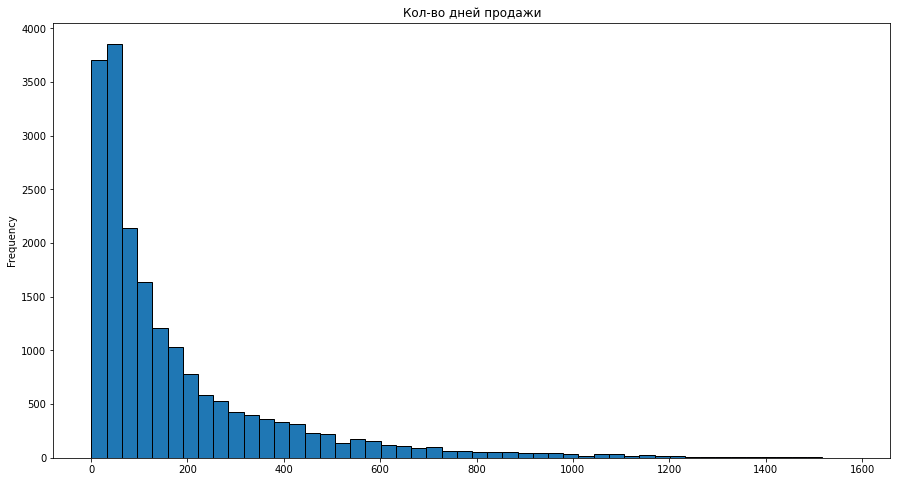

In [169]:
data['days_exposition'].plot(kind='hist', title='Кол-во дней продажи', figsize=(15,8), ec='black', bins=50)


<AxesSubplot:title={'center':'Кол-во дней продажи'}, ylabel='Frequency'>

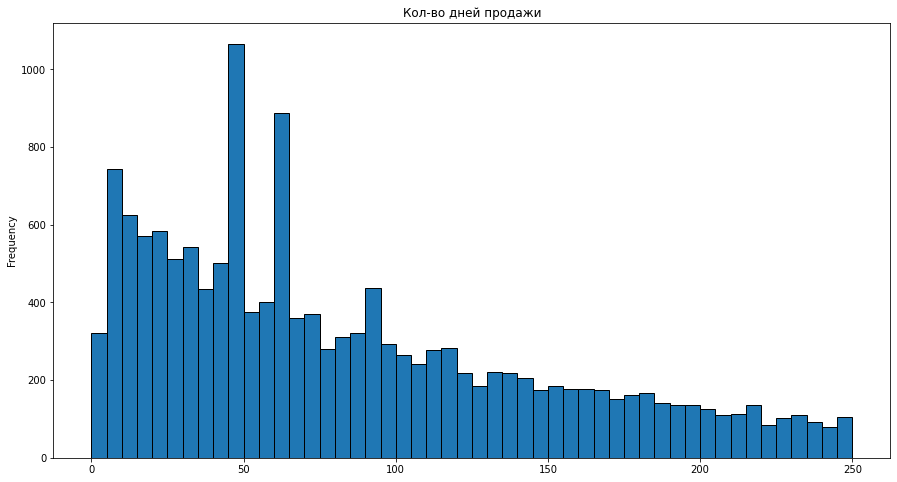

In [170]:
data['days_exposition'].plot(kind='hist', title='Кол-во дней продажи', figsize=(15,8), ec='black', bins=50, range=(0,250))

In [171]:
data.query('days_exposition > 100')['days_exposition'].count()

9351

In [172]:
data.query('days_exposition <= 100')['days_exposition'].count()

9983

In [173]:
data.query('days_exposition <= 10')['days_exposition'].count()

1192

In [174]:
data.query('days_exposition == 1')['days_exposition'].count()

1

In [175]:
data.query('days_exposition > 200')['days_exposition'].count()

5485

In [176]:
data.query('days_exposition > 365')['days_exposition'].count()

2854

In [177]:
data.query('days_exposition > 500')['days_exposition'].count()

1622

**ВЫВОД**

Медианное значение - 169
Среднее значение - 95

Большинство квартир продаются в первые 100 дней. Быстрыми можно назвать продажи квартир за 45 дней и меньше. Хотя есть и весомое кол-во супербыстрых продаж в первые 10 дней (1252 шт.). Долгими можно назвать продажи больше 200 дней. Необычно долгими я бы назвал продажи в 365 и выше (скорее всего такие дома долго продавались из-за того, было плохо заполнено объявление или не заполнено вовсе.

### Задание 2: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров.

In [178]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publicate,month_of_publicate,year_of_publicate,type_floor,city_centers_km
0,20,13.000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3.350,40,2018-12-04,1,-1.00,11,18,1,False,False,False,11,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,83750.0,1,12,2018,первый,19.0
2,10,5.196,56,2015-08-20,2,-1.00,5,34,4,False,False,False,8,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.7,3,8,2015,другой,14.0
4,2,10.000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2.890,30,2018-09-10,1,-1.00,12,14,5,False,False,False,9,0,поселок Янино-1,NaN,NaN,1,NaN,1,NaN,55.0,96333.3,0,9,2018,другой,NaN


In [179]:
data['last_price'].describe()

count    22246.000000
mean         5.826452
std          3.864358
min          1.510000
25%          3.500000
50%          4.700000
75%          6.700000
max         30.000000
Name: last_price, dtype: float64

**От общей площади**

Корреляция цены и площади
            last_price  total_area
last_price    1.000000    0.884076
total_area    0.884076    1.000000 



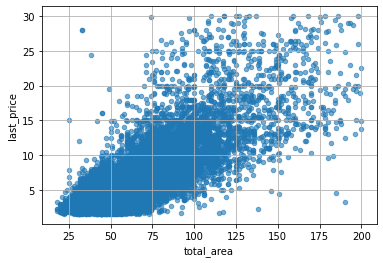

In [180]:
data.pivot_table(index='total_area', values='last_price')
data.plot(x='total_area', y='last_price', kind='scatter',grid=True, alpha=0.6)
print('Корреляция цены и площади')
print(data.pivot_table(index='floor', values=['total_area', 'last_price'],).corr(),'\n')

Корреляция цены и площади
            last_price  total_area
last_price    1.000000    0.884076
total_area    0.884076    1.000000 



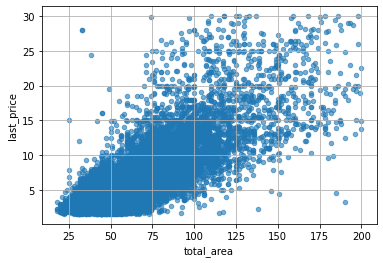

In [181]:
data.pivot_table(index='total_area', values='last_price')
data.plot(x='total_area', y='last_price', kind='scatter',grid=True, alpha=0.6)
print('Корреляция цены и площади')
print(data.pivot_table(index='floor', values=['total_area', 'last_price'],).corr(),'\n')

**От живой площади**

Корреляция цены и жилой площади
             last_price  living_area
last_price     1.000000     0.776594
living_area    0.776594     1.000000 



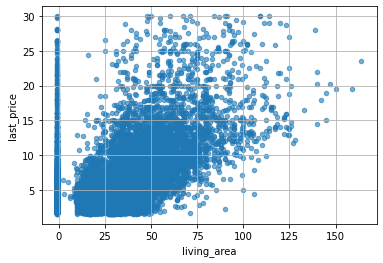

In [182]:
data.pivot_table(index='living_area', values='last_price')
data.plot(x='living_area', y='last_price', kind='scatter',grid=True, alpha=0.6)
print('Корреляция цены и жилой площади')
print(data.pivot_table(index='floor', values=['living_area', 'last_price'],).corr(),'\n')

**От площади кухни**          

Корреляция цены и площади кухни
              kitchen_area  last_price
kitchen_area      1.000000    0.461321
last_price        0.461321    1.000000 



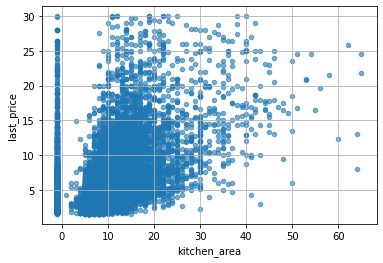

In [183]:
data.pivot_table(index='kitchen_area', values='last_price')
data.plot(x='kitchen_area', y='last_price', kind='scatter',grid=True, alpha=0.6)
print('Корреляция цены и площади кухни')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price'],).corr(),'\n')

**От количества комнат**

Корреляция цены и кол-вом комнат
            last_price     rooms
last_price    1.000000  0.565225
rooms         0.565225  1.000000 



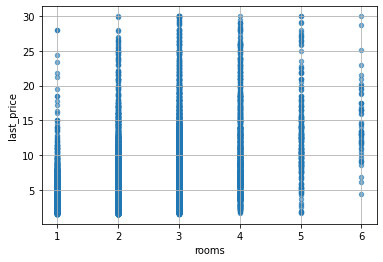

In [184]:
data.pivot_table(index='rooms', values='last_price')
data.plot(x='rooms', y='last_price', kind='scatter',grid=True, alpha=0.6)
print('Корреляция цены и кол-вом комнат')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

<AxesSubplot:xlabel='rooms'>

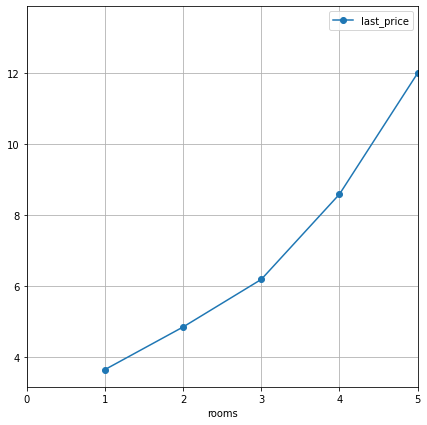

In [185]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(7, 7),xlim=(0,5))

<AxesSubplot:xlabel='rooms'>

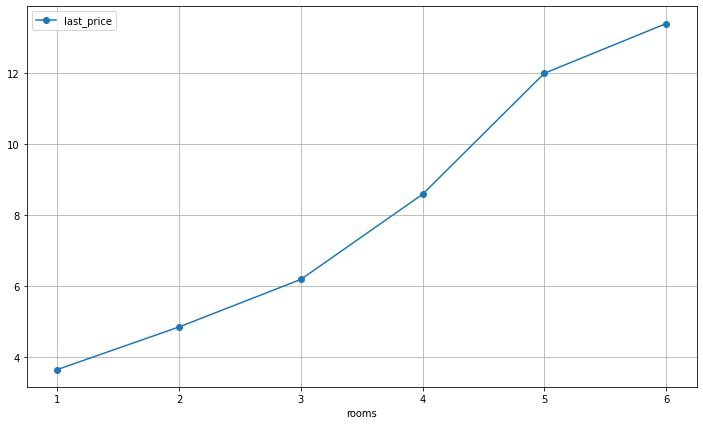

In [186]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(12,7),)

**От этажа, на котором расположена квартира (первый, последний, другой)**


Корреляция цены и типа этажа


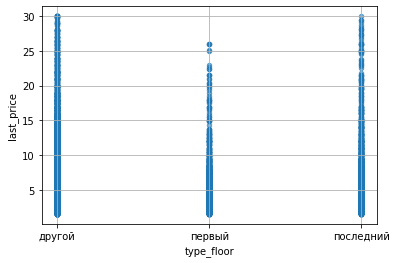

In [187]:
data.pivot_table(index='type_floor', values='last_price')
data.plot(x='type_floor', y='last_price', kind='scatter',grid=True, alpha=0.6)
print('Корреляция цены и типа этажа')
##print(data.pivot_table(index='floor', values=['type_floor', 'last_price'],).corr(),'\n')

<AxesSubplot:xlabel='type_floor'>

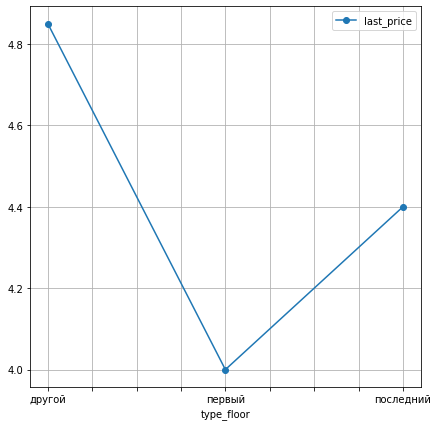

In [188]:
data.pivot_table(index='type_floor', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(7, 7))

**От даты размещения (день недели, месяц, год)**

Корреляция цены и дня публикации


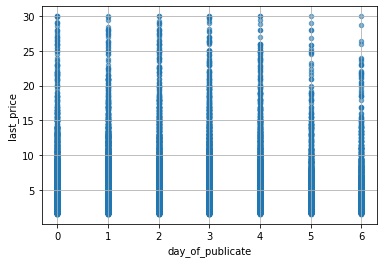

In [189]:
data.pivot_table(index='day_of_publicate', values='last_price')
data.plot(x='day_of_publicate', y='last_price', kind='scatter',grid=True, alpha=0.6)
print('Корреляция цены и дня публикации')
##print(data.pivot_table(index='floor', values=['day_of_publicate', 'last_price'],).corr(),'\n')

<AxesSubplot:xlabel='day_of_publicate'>

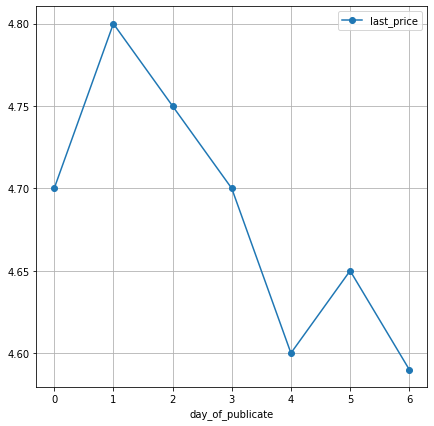

In [190]:
data.pivot_table(index='day_of_publicate', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(7, 7))

Корреляция цены и месяца публикации


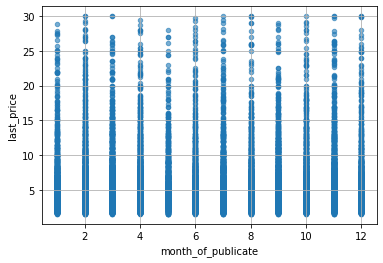

In [191]:
data.pivot_table(index='month_of_publicate', values='last_price')
data.plot(x='month_of_publicate', y='last_price', kind='scatter',grid=True, alpha=0.6)
print('Корреляция цены и месяца публикации')
##print(data.pivot_table(index='floor', values=['month_of_publicate', 'last_price'],).corr(),'\n')

<AxesSubplot:xlabel='month_of_publicate'>

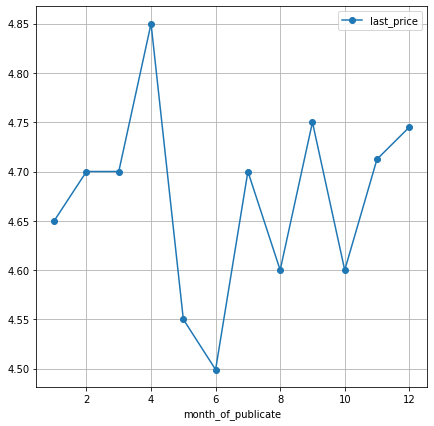

In [192]:
data.pivot_table(index='month_of_publicate', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(7, 7))

Корреляция цены и года публицации


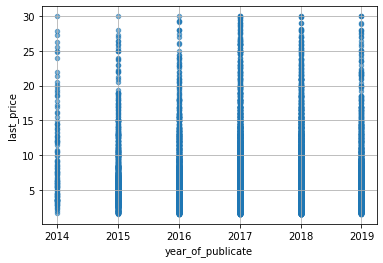

In [193]:
data.pivot_table(index='year_of_publicate', values='last_price')
data.plot(x='year_of_publicate', y='last_price', kind='scatter',grid=True, alpha=0.6)
print('Корреляция цены и года публицации')
##print(data.pivot_table(index='floor', values=['year_of_publicate', 'last_price'],).corr(),'\n')

<AxesSubplot:xlabel='year_of_publicate'>

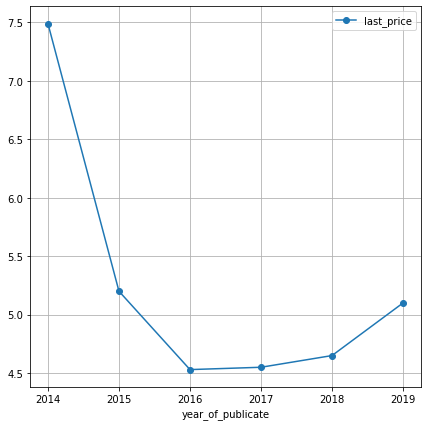

In [194]:
data.pivot_table(index='year_of_publicate', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(7, 7))

**ВЫВОД**

**От общей площади**
Чем больше площадь, тем выше стоимость.

**От жилой площади**
Такая же как и общей площади, чем больше площадь, тем выше стоимость.

**От площади кухни**
Тут уже влияние площади кухни, на стоимость квартиры минимально.

**От количества комнат**
Чем больше комнат, тем больше цена, однако зависимость ниже, чем у общей площади и у жилой, но выше чем у площади кухни.

**От этажа, на котором расположена квартира (первый, последний, другой)**
Квартиры на первом этаже самые дешевые квартиры, самые дорогие со статусом другой.

**От даты размещения (день недели, месяц, год)**
День недели: дороже всего квартиры, опубликованные во вторник, дешевле всего опубликованные в воскресенье.
Месяц: Дороже всего в 4 месяце( апреле), дешевле в 6 июне.
Год: Самая дешёвая цена на квартиры была в 2016-2018 годах.


### Задание 3: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [195]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15112
поселок Мурино         526
поселок Шушары         435
Всеволожск             387
Пушкин                 364
Колпино                337
поселок Парголово      322
Гатчина                301
деревня Кудрово        283
Выборг                 224
Name: locality_name, dtype: int64

In [196]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publicate,month_of_publicate,year_of_publicate,type_floor,city_centers_km
0,20,13.000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3.350,40,2018-12-04,1,-1.00,11,18,1,False,False,False,11,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,83750.0,1,12,2018,первый,19.0
2,10,5.196,56,2015-08-20,2,-1.00,5,34,4,False,False,False,8,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.7,3,8,2015,другой,14.0
4,2,10.000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2.890,30,2018-09-10,1,-1.00,12,14,5,False,False,False,9,0,поселок Янино-1,NaN,NaN,1,NaN,1,NaN,55.0,96333.3,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23559,9,4.600,62,2016-08-05,3,2.60,9,40,8,False,False,False,8,0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239.0,74193.5,4,8,2016,другой,34.0
23560,9,9.700,133,2017-03-21,3,3.70,5,73,3,False,False,False,13,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72932.3,1,3,2017,другой,4.0
23561,14,3.100,59,2018-01-15,3,-1.00,5,38,4,False,False,False,8,0,Тосно,NaN,NaN,1,NaN,1,NaN,45.0,52542.4,0,1,2018,другой,NaN
23562,18,2.500,56,2018-02-11,2,-1.00,3,29,1,False,False,False,-1,0,село Рождествено,NaN,NaN,1,NaN,1,NaN,NaN,44642.9,6,2,2018,первый,NaN


In [197]:
top10 = data.pivot_table(index = 'locality_name', values = 'price_per_m2', aggfunc=['count', 'mean'])
top10.columns = ['count', 'price']

In [198]:
top10 = top10.sort_values('count', ascending = False).head(10)

In [199]:
top10

,count,price
locality_name,,
Санкт-Петербург,15112,111057.082378
поселок Мурино,526,85635.652091
поселок Шушары,435,78673.670805
Всеволожск,387,69261.798191
Пушкин,364,103614.617308
Колпино,337,75644.774777
поселок Парголово,322,90952.013043
Гатчина,301,69841.654485
деревня Кудрово,283,92835.572085


**Вывод**

Самая большая стоимость жилья в Санкт-Петербурге, Наименьшая Выборге из 10 пунктов с самым большим количеством объявлений.

In [200]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_m2', 'day_of_publicate',
       'month_of_publicate', 'year_of_publicate', 'type_floor',
       'city_centers_km'],
      dtype='object')

### Задание 4: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. 

In [201]:
spb = data.loc[data['locality_name'] == 'Санкт-Петербург' ]

округлим до целого

In [202]:
spb['city_centers_km'] = spb['city_centers_km'].round()

/tmp/ipykernel_78/1554634267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['city_centers_km'] = spb['city_centers_km'].round()


In [203]:
spb['city_centers_km']

0        16.0
2        14.0
4         8.0
7        12.0
9        15.0
         ... 
23555    16.0
23556     6.0
23557     4.0
23560     4.0
23563    10.0
Name: city_centers_km, Length: 15112, dtype: float64

<AxesSubplot:xlabel='city_centers_km'>

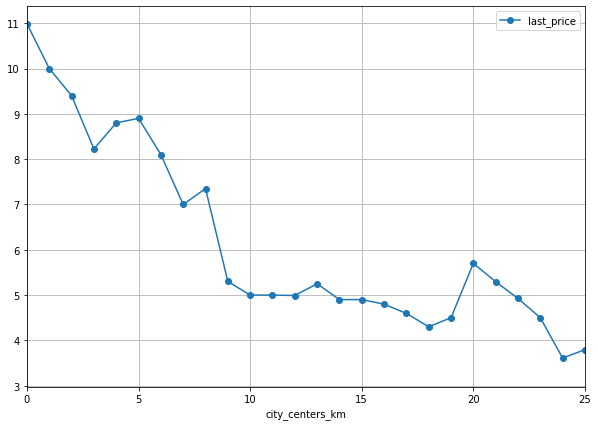

In [204]:
spb.pivot_table(index='city_centers_km', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(10, 7), xlim=(0,25))

<AxesSubplot:xlabel='city_centers_km'>

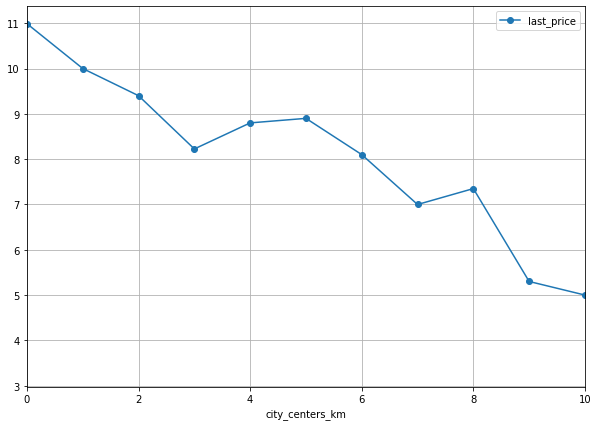

In [205]:
spb.pivot_table(index='city_centers_km', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(10, 7), xlim=(0,10))

In [206]:
spb.pivot_table(index='city_centers_km', values='last_price', aggfunc='median')

,last_price
city_centers_km,
0.0,10.990000
1.0,10.000000
2.0,9.400000
3.0,8.225000
4.0,8.800000
5.0,8.900000
6.0,8.100000
7.0,6.999000
8.0,7.350000


**Вывод**

Наибольшая цена на недвижимость наблюдается в радиусе 3км от центра. После 8 км от центра цена уже не так зависит от удаленности от центра.

### Общий вывод

Мы проверили четыре гипотезы и установили:

**Как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.**
Большинство квартир продаются в первые 100 дней. Быстрыми можно назвать продажи квартир за 45 дней и меньше. <br>Долгими можно назвать продажи больше 200 дней.

**Факторы больше всего влияют на общую (полную) стоимость объекта**
Чем больше общая и жилая площадь, тем выше стоимость.<br>
Чем больше комнат, тем больше цена, однако зависимость ниже, чем у общей площади и у жилой.<br>
Квартиры на первом этаже самые дешевые квартиры, самые дорогие со статусом другой.<br>
День недели: дороже всего квартиры, опубликованные во вторник, дешевле всего опубликованные в воскресенье.<br>
Месяц: Дороже всего в 4 месяце( апреле), дешевле в 6 июне.<br>
Год: Самая дешёвая цена на квартиры была в 2016-2018 годах.<br>

**Среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**
Самая большая стоимость жилья в Санкт-Петербурге, Наименьшая Выборге.


**Квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.** 
Наибольшая цена на недвижимость наблюдается в радиусе 3км от центра.
    
    

**Общий вывод.** 

На стоимость квартиры сильно влияет общая и жилая площадь и кол-во комнат. Квартиры на первом этаже обходятся дешевле других. Чаще всего чтобы продать свою квартиру потребуется 100 дней. Дороже всего стоимость квадратного метра в Санкт-Петербурге, дешевле всего в Выборге. Также на цену существенно влияет, если удалённость от центра менее 7км. Квартиры, размещенные в выходные дешевле всего. Самые дорогие кварты опубликованы в апреле, самые дешевые в июне. В 2016 - 2018 годы были самые дешевые по средней стоимости квартиры. 